In [1]:
#   imports

from calculation import xy_from_dict_fn
from initialize import Experiment
from metrics import Bins, MutualInfoInterwell
from figures import PlotLine


In [2]:
#   global variable declaration

experiment_number = 20230404


In [3]:
#   initialize

experiment = Experiment(20230404)
experiment_gfp_bins = Bins(experiment.gfp_pop_dict)
experiment_gfp_mi = MutualInfoInterwell(experiment.timestep_list, 
                                        experiment.all_well_gfp_pop_dict, 
                                        experiment_gfp_bins.bin_edges)


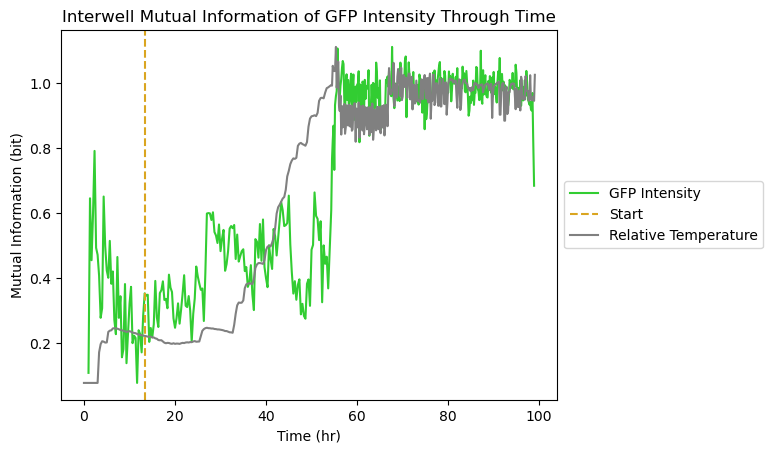

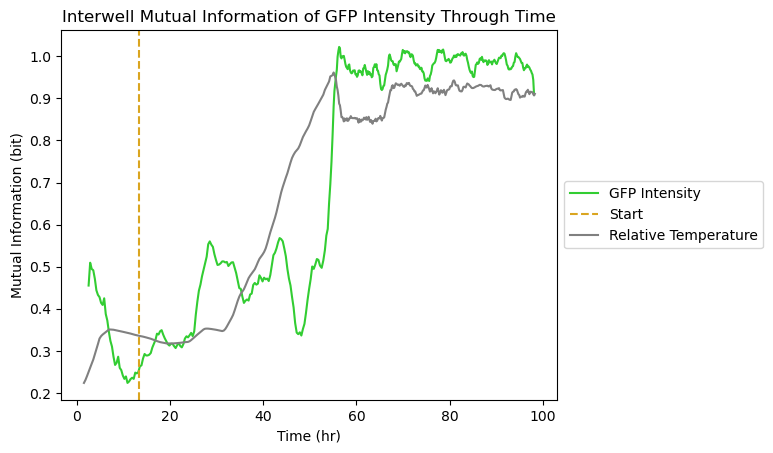

In [4]:
#    plot mutual information of gfp through time

x, y = xy_from_dict_fn(experiment_gfp_mi.mi_dict)
x = [experiment.elapsed_dict[t] for t in x]
temp_x, temp_y = xy_from_dict_fn(experiment.temp_dict)
temp_x = [experiment.elapsed_dict[t] for t in temp_x]
start_x = experiment.elapsed_dict[experiment_gfp_mi.start_timestep]

for avg in (1, 10):
    plot = PlotLine(x, y, avg=avg, label='GFP Intensity', color='limegreen', 
                    axv_x_list=[start_x], axv_label_list=['Start'], 
                    axv_color_list=['goldenrod'], temp_x=temp_x, temp_y=temp_y, 
                    temp_avg=avg, temp_label='Relative Temperature', 
                    title='Interwell Mutual Information of GFP Intensity Through '\
                    'Time', xlabel='Time (hr)', ylabel='Mutual Information (bit)', 
                    save=f'mutual_info_figures/gfp_mi_interwell_avg_{avg}.png')
    plot.show()
